how to use facebook prophet for forecasting 5 minu

In [ ]:
import pandas as pd
from fbprophet import Prophet


In [102]:


df = pd.read_csv('c13.csv')

df.columns = ['ds', 'OPEN', 'HIGH', 'LOW', 'y',]

df['ds']= pd.to_datetime(df['ds'])


df['ds'].dt.tz_localize(None),

df["ds"] = df["ds"].dt.strftime("%Y-%m-%d %H:%M:%S")

I had the best results with 800-1700 time stamps for the 5 minute time periods this is for bitcoin anyways the results were nearly flawless on a thursday night and a saturday night i tested on btc so 12am-3am eastern time but totally didn't work when i tested on a monday afternoon, if you come across this just use it as a blueprint for custom charts that you can see the price at whatever point you point the mouse at which are waaay better than any other charts available for python honestly, its easy too just df.iplot() after importing cufflinks, set the ds/ date column as the datetime index and ur good to go with this line here DF2 = DF2.set_index(pd.DatetimeIndex(DF2['ds'])) change the data frame name and column name for your date accordingly, If you can figure this notebook out you can won't have an issue using other people's code, i think this is the major road block I faced for a long time was just not knowing this stuff fluently, I lost alot of time because of that, because I would be trying to do someone elses code and I didn't know how to do some of this stuff here so it made it discouraging when, like for example to figure out how to remove the timezone from the data, with dt.tz_localize(none) to drop the extra timezone data that i didn't even know was time zone when i downloaded new data, i use tradingview for data best of luck this is noob stuff but if ur where i was 2 months ago it will be useful, and even if u know all of this stuff but are not aware of cufflinks then bonus!

In [96]:
df = df.iloc[800:]

In [103]:
df

,ds,OPEN,HIGH,LOW,y
0,2021-04-01 06:20:00,58921.00000,58999.000000,58920.00000,58927.000000
1,2021-04-01 06:25:00,58926.00000,58929.000000,58861.00000,58929.000000
2,2021-04-01 06:30:00,58915.00000,58994.000000,58915.00000,58970.000000
3,2021-04-01 06:35:00,58970.00000,58971.000000,58920.00000,58920.000000
4,2021-04-01 06:40:00,58920.00000,58939.000000,58880.00000,58915.000000
...,...,...,...,...,...
1677,2021-04-07 02:05:00,57566.45549,57579.000000,57566.45549,57578.000000
1678,2021-04-07 02:10:00,57579.00000,57579.000000,57510.00000,57565.000000
1679,2021-04-07 02:15:00,57560.00000,57604.000000,57560.00000,57587.544588
1680,2021-04-07 02:20:00,57588.00000,57756.701988,57588.00000,57713.000000


In [104]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [105]:
future = m.make_future_dataframe(periods=20, freq='5min')
future.tail(5)

,ds
1697,2021-04-07 03:45:00
1698,2021-04-07 03:50:00
1699,2021-04-07 03:55:00
1700,2021-04-07 04:00:00
1701,2021-04-07 04:05:00


In [111]:
forecast = m.predict(future)
DF2 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
DF2.tail(20)

,ds,yhat,yhat_lower,yhat_upper
1682,2021-04-07 02:30:00,57893.740602,57667.652340,58131.488988
1683,2021-04-07 02:35:00,57896.200398,57662.534181,58133.658007
1684,2021-04-07 02:40:00,57898.327012,57667.880423,58138.366977
1685,2021-04-07 02:45:00,57900.097839,57655.613820,58137.234564
1686,2021-04-07 02:50:00,57901.492274,57663.405506,58129.142923
1687,2021-04-07 02:55:00,57902.491843,57683.708746,58138.382683
1688,2021-04-07 03:00:00,57903.080320,57657.257325,58147.807117
1689,2021-04-07 03:05:00,57903.243832,57665.891142,58141.476136
1690,2021-04-07 03:10:00,57902.970934,57671.059269,58142.894644
1691,2021-04-07 03:15:00,57902.252687,57665.796822,58136.328078


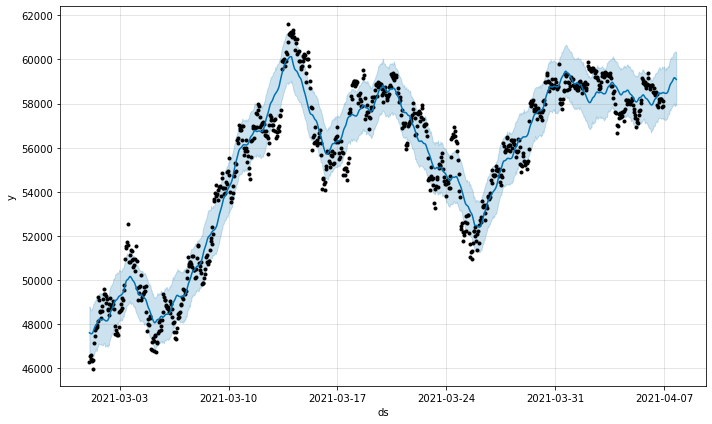

In [38]:
fcst = m.predict(future)
fig = m.plot(fcst)

In [ ]:
fcst.tail(10)

In [ ]:
import pandas as pd

In [109]:
import cufflinks as cf

setting date time index on the pandas dataframe for the charts so they don't just print two strait lines.

In [112]:
DF2 = DF2.set_index(pd.DatetimeIndex(DF2['ds']))

In [113]:
new = DF2.filter(['ds','yhat'], axis=1)

Dropping the un needed column, easiest way.

In [114]:
del new['ds']

confirming the dataframe looks like it should to be charted

In [115]:
new

,yhat
ds,
2021-04-01 06:20:00,58957.735512
2021-04-01 06:25:00,58951.821508
2021-04-01 06:30:00,58946.146105
2021-04-01 06:35:00,58940.711907
2021-04-01 06:40:00,58935.519325
...,...
2021-04-07 03:45:00,57888.413850
2021-04-07 03:50:00,57884.543636
2021-04-07 03:55:00,57880.248671


Plotting the data with interactive charts


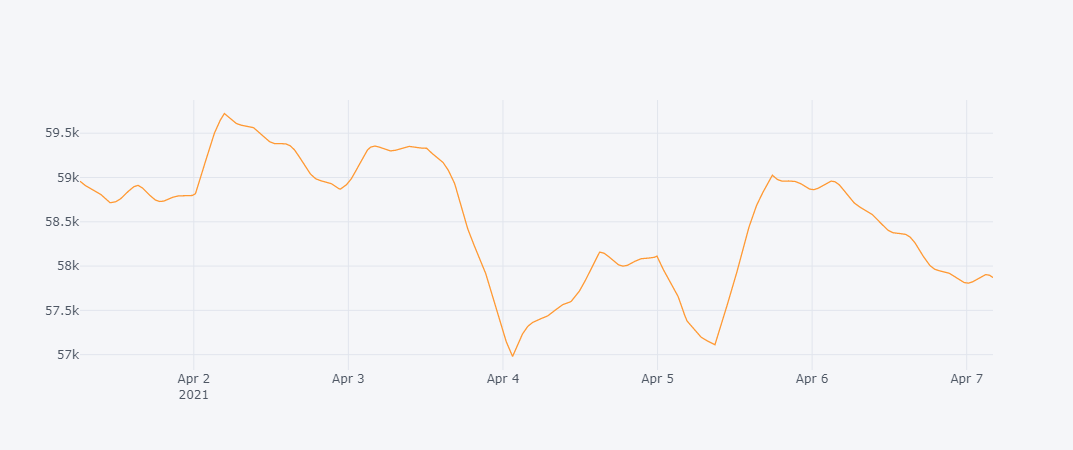

In [116]:
new.iplot()

example of just plotting the predicted data! and making a new dataframe with the 20 last data points

In [119]:
newest = new.iloc[::20]

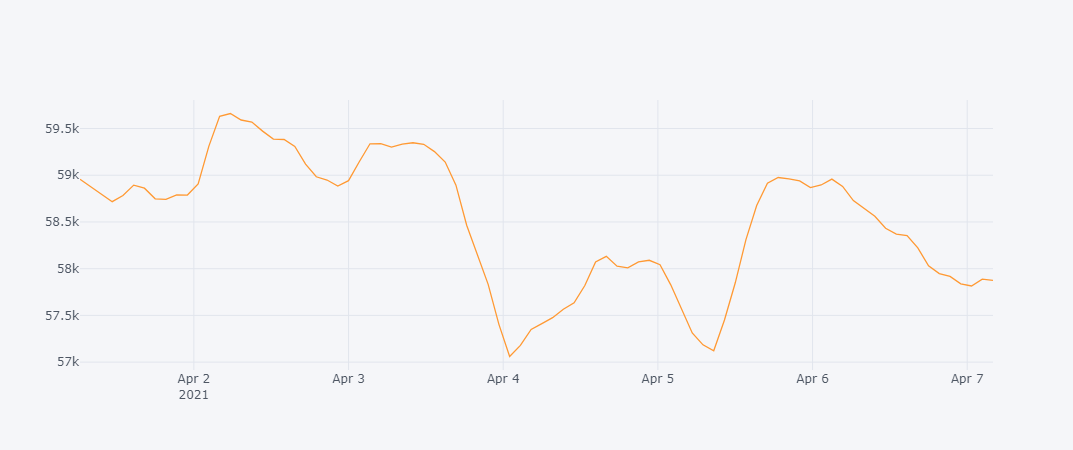

In [120]:
newest.iplot()

how to just show the last 20 data points without the chart. or creating a new dataframe

In [122]:
new.tail(20)

,yhat
ds,
2021-04-07 02:30:00,57893.740602
2021-04-07 02:35:00,57896.200398
2021-04-07 02:40:00,57898.327012
2021-04-07 02:45:00,57900.097839
2021-04-07 02:50:00,57901.492274
2021-04-07 02:55:00,57902.491843
2021-04-07 03:00:00,57903.080320
2021-04-07 03:05:00,57903.243832
2021-04-07 03:10:00,57902.970934
